In [1]:
# -*- coding:utf-8 -*-

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

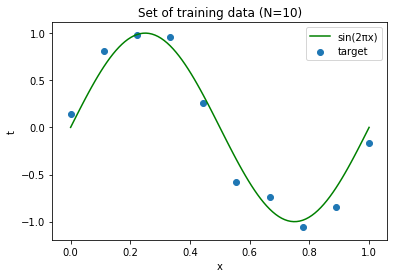

In [2]:
# 観測点の作成
N = 10
x_vals = np.reshape(np.linspace(0., 1., N), newshape=[N, 1])
c_vals = np.reshape(np.linspace(0., 1., 100), newshape=[100, 1])    # 検証用の連続点
x = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# 目標データ集合の作成
sin = tf.sin(2.*np.pi*x)
noise = tf.random_normal([N, 1], stddev=0.1)
t = sin + noise

with tf.Session() as sess:
    plt.plot(c_vals, sess.run(sin, feed_dict={x: c_vals}), color='green', label='sin(2πx)')
    plt.scatter(x_vals, sess.run(t, feed_dict={x: x_vals}), label='target')
    plt.title('Set of training data (N=10)')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.legend()
    plt.show()

In [3]:
# 多項式の設定
M = 3
w = tf.Variable(tf.random_normal([M + 1, 1]))
xj = tf.pow(x, np.arange(M + 1))
y = tf.matmul(xj, w)

# 損失関数の設定
loss = tf.div(tf.reduce_sum(tf.square(tf.subtract(y, t))), 2.)

# 最適化アルゴリズムの設定
learning_rate = 0.50
opt = tf.train.AdamOptimizer(learning_rate)
train = opt.minimize(loss)

step[0]  loss : 6.592177867889404
step[200]  loss : 0.9854956269264221
step[400]  loss : 0.892101526260376
step[600]  loss : 0.48705029487609863


step[800]  loss : 0.19441795349121094
step[1000]  loss : 0.29644742608070374
step[1200]  loss : 0.18558722734451294
step[1400]  loss : 0.22957578301429749


step[1600]  loss : 0.264987051486969
step[1800]  loss : 0.4812290072441101


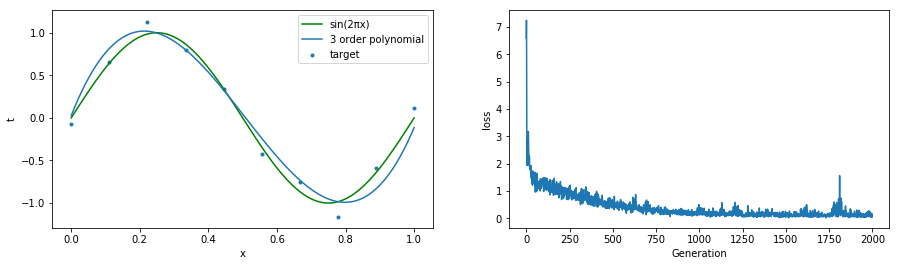

In [4]:
loss_vec = []  # 損失を保存しておくためのリスト

with tf.Session() as sess:
    # 変数初期化
    sess.run(tf.global_variables_initializer())

    # 訓練開始
    epoch = 2000
    for step in range(epoch):
        sess.run(train, feed_dict={x: x_vals})
        tmp_loss = sess.run(loss, feed_dict={x: x_vals})
        loss_vec.append(tmp_loss)
        if step % (epoch / 10) == 0:
            print('step[{}]  loss : {}'.format(step, tmp_loss))

    # 結果の表示
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    ax1.plot(c_vals, sess.run(sin, feed_dict={x: c_vals}), color='green', label='sin(2πx)')
    ax1.plot(c_vals, sess.run(y, feed_dict={x: c_vals}), label='{} order polynomial'.format(M))
    ax1.scatter(x_vals, sess.run(t, feed_dict={x: x_vals}), label='target', marker='.')
    ax1.set_xlabel('x')
    ax1.set_ylabel('t')
    ax1.legend()
    ax2.plot(loss_vec)
    ax2.set_xlabel('Generation')
    ax2.set_ylabel('loss')